In [5]:
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import plotly.express as px
import hvplot.pandas
from shapely.geometry import Point

import folium
from folium.plugins import MarkerCluster
import panel as pn
pn.extension()
pn.extension('plotly', design='material')
import matplotlib.pyplot as plt

In [6]:
# Load CSV file
df = pd.read_csv('bornes-de-recharge-pour-vehicules-electriques-irve-electra.csv')

In [7]:
# visualise main columns
df[['id_pdc_itinerance', 'nom_station', 'adresse_station', 'coordonneesXY', 'date_mise_en_service']].head(15)

,id_pdc_itinerance,nom_station,adresse_station,coordonneesXY,date_mise_en_service
0,FRELCE9FKT,Nanterre - Hôtel Campanile,20-22 avenue Pablo Picasso 92000 Nanterre,"[2.21382200,48.89196800]",02-12-2022
1,FRELCEVLFL,Nanterre - Hôtel Campanile,20-22 avenue Pablo Picasso 92000 Nanterre,"[2.21382200,48.89196800]",02-12-2022
2,FRELCELB6A,Frouard - KFC,156 rue de Nancy 54390 Frouard,"[6.14980300,48.74703900]",30-04-2024
3,FRELCES6JV,Frouard - KFC,156 rue de Nancy 54390 Frouard,"[6.14980300,48.74703900]",30-04-2024
4,FRELCED9J7,Frouard - KFC,156 rue de Nancy 54390 Frouard,"[6.14980300,48.74703900]",30-04-2024
5,FRELCEHD55,Frouard - KFC,156 rue de Nancy 54390 Frouard,"[6.14980300,48.74703900]",30-04-2024
6,FRELCEWDGJ,Artigues-près-Bordeaux - Jardiland,26 à 34 avenue de l'Île de France 33370 Artigu...,"[-0.49696700,44.84355100]",23-01-2024
7,FRELCELPD4,Artigues-près-Bordeaux - Jardiland,26 à 34 avenue de l'Île de France 33370 Artigu...,"[-0.49696700,44.84355100]",23-01-2024
8,FRELCE6Z89,Artigues-près-Bordeaux - Jardiland,26 à 34 avenue de l'Île de France 33370 Artigu...,"[-0.49696700,44.84355100]",23-01-2024
9,FRELCEDVHP,Artigues-près-Bordeaux - Jardiland,26 à 34 avenue de l'Île de France 33370 Artigu...,"[-0.49696700,44.84355100]",23-01-2024


C:\Users\hp\AppData\Local\Temp\ipykernel_11664\4204180328.py:13: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


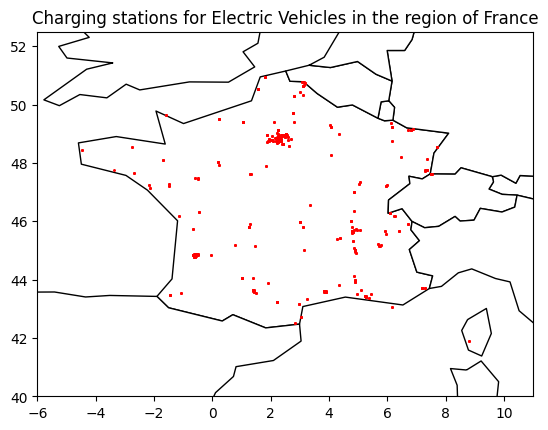

In [9]:
# Extract latitude and longitude from the single column
def extract_coordinates(coord_str):
    coord_list = eval(coord_str) # convert string representation of list to actual list
    return coord_list[1], coord_list[0] # latitude, longitude

df['Latitude'], df['Longitude'] = zip(*df['coordonneesXY'].apply(extract_coordinates))

# Create GeoDataFrame
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Load world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter to only include Europe
europe = world[world['continent'] == 'Europe']

# Plot the map
ax = europe.plot(color='white', edgecolor='black')
gdf.plot(ax=ax, marker='.', color='red', markersize=3)
plt.xlim([-6, 11])  # Adjusting x-axis limits to focus on Europe
plt.title('Charging stations for Electric Vehicles in the region of France')
plt.ylim([40, 52.5])   # Adjusting y-axis limits to focus on Europe
plt.show()

In [14]:
df['date_mise_en_service']= pd.to_datetime(df['date_mise_en_service'], dayfirst=True)
date_slider = pn.widgets.DateSlider(
    name='Date of activation',
    start=df['date_mise_en_service'].min(),
    end=df['date_mise_en_service'].max(),
    value=df['date_mise_en_service'].min()  # Single date value
)

df['date_mise_en_service']= pd.to_datetime(df['date_mise_en_service'], dayfirst=True).dt.date

In [15]:
def extract_coordinates(coord_str):
    coord_list = eval(coord_str) # convert string representation of list to actual list
    return coord_list[1], coord_list[0] # latitude, longitude

df['Latitude'], df['Longitude'] = zip(*df['coordonneesXY'].apply(extract_coordinates))

# Create GeoDataFrame
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

def update_map_date(selected_date):
    # Filter the DataFrame based on the selected date
    filtered_df = df[df['date_mise_en_service'] == selected_date].copy()
    # Define the latitude and longitude ranges for Europe
    lat_range = (36, 70)  # Adjusted latitude range for Europe
    lon_range = (-10, 35)
    # Create the scatter geo plot
    fig = px.scatter_geo(filtered_df, lat='Latitude', lon='Longitude',
                         scope='europe')
    return fig

In [17]:
# Bind the update_map function to the date_slider, vertical layout
interactive_panel = pn.Column(date_slider, pn.bind(update_map_date, date_slider))

# Serve the Panel dashboard
interactive_panel.servable()

Column(design=<class 'panel.theme.materi...)
    [0] DateSlider(design=<class 'panel.theme.materi..., end=Timestamp('2024-04-30 0..., name='Date of activation', start=Timestamp('2021-12-20 0..., value=datetime.date(2023, ...)
    [1] ParamFunction(function, _pane=Plotly, defer_load=False, design=<class 'panel.theme.materi...)

In [18]:
# reload the df
df = pd.read_csv('bornes-de-recharge-pour-vehicules-electriques-irve-electra.csv', low_memory=False)
df['Latitude'], df['Longitude'] = zip(*df['coordonneesXY'].apply(extract_coordinates))
division = sorted(df['nom_station'].unique().tolist())
division_selector = pn.widgets.Select(name='Administrative division area', options=division)

In [19]:
def create_foliumMap(data):

    # Calculate the mean latitude and longitude to center the map
    center_lat = data['Latitude'].mean()
    center_lon = data['Longitude'].mean()

    # Create a Folium map centered on the average location
    folium_map = folium.Map(location=[center_lat, center_lon], zoom_start=4)

    # Use a MarkerCluster to add markers for each event
    marker_cluster = MarkerCluster().add_to(folium_map)

    # Add a marker for each event
    for idx, row in data.iterrows():
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            popup=f"Address of station: {row['adresse_station']}<br>Power rating of station (in KWh): {row['puissance_nominale']}",
        ).add_to(marker_cluster)

    # Return the Folium map object
    return folium_map

In [20]:
def update_address(df, division, width, height):
    # Filter the DataFrame for the selected country
    data = df[df['nom_station'] == division].copy()
    folium_map = create_foliumMap(data)
    # Panel doesn't directly render Folium maps, so we need to render it as HTML
    return pn.pane.HTML(folium_map._repr_html_(), width=width, height=height)

In [21]:
width = 800
height = 500
map_pane = pn.bind(update_address, df,  division_selector.param.value, width, height)

# Layout the dashboard
dashboard = pn.Column(
    pn.Row(division_selector),
    map_pane
)

dashboard.servable()

Column(design=<class 'panel.theme.materi...)
    [0] Row(design=<class 'panel.theme.materi...)
        [0] Select(design=<class 'panel.theme.materi..., name='Administrative d..., options=['A55 - Aire de Gignac Reb...], value='A55 - Aire de G...)
    [1] ParamFunction(function, _pane=HTML, defer_load=False, design=<class 'panel.theme.materi...)

In [22]:
# reload the df
df = pd.read_csv('bornes-de-recharge-pour-vehicules-electriques-irve-electra.csv', low_memory=False)
df['Latitude'], df['Longitude'] = zip(*df['coordonneesXY'].apply(extract_coordinates))
division = sorted(df['nom_station'].unique().tolist())
division_selector = pn.widgets.Select(name='Administrative division area', options=division)
columns = ['id_pdc_itinerance', 'nom_station', 'adresse_station', 'nbre_pdc']

In [23]:
def create_foliumMap(data):

    # Calculate the mean latitude and longitude to center the map
    center_lat = data['Latitude'].mean()
    center_lon = data['Longitude'].mean()

    # Create a Folium map centered on the average location
    folium_map = folium.Map(location=[center_lat, center_lon], zoom_start=5)

    # Use a MarkerCluster to add markers for each event
    marker_cluster = MarkerCluster().add_to(folium_map)

    # Add a marker for each event
    for idx, row in data.iterrows():
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            popup=f"Address of station: {row['adresse_station']}<br>Power rating of station (in KWh): {row['puissance_nominale']}",
        ).add_to(marker_cluster)

    # Return the Folium map object
    return folium_map

In [24]:
division = sorted(df['nom_station'].unique().tolist())
division_selector = pn.widgets.Select(name='Administrative division area', options=division)

@pn.depends(division_selector.param.value)
def update_components(division):
    # Update the map
    map_pane = update_address(df, division, width, height)
    
    # Filter the data for the DataFrame pane
    data = df[df['nom_station'] == division]
    
    # DataFrame pane
    df_pane = pn.widgets.DataFrame(data[columns])

    # Use GridSpec for layouts
    grid = pn.GridSpec(width=1400, height=750)
    grid[0, 0:3] = division_selector
    grid[1:6, :3] = map_pane
    grid[1:3, 3:6] = df_pane
    
    return grid

# Layout the dashboard
dashboard = pn.Column(update_components)
dashboard.servable()

Column(design=<class 'panel.theme.materi...)
    [0] ParamFunction(function, _pane=GridSpec, defer_load=False, design=<class 'panel.theme.materi...)

In [28]:
# !jupyter nbconvert --to html assignment2.ipynb